# Enoncé du projet


ProjetNLP

The goal of the project is to provide a data text synthesis of a massive corpora of scientific articles
about natural language processing.
This amount of data is not really big, just 44Mo, but is big enough to be too complicated to be
processed by hand.
The way to generate the synthesis and what kind of synthesis is completely open !
You can use all tools and models seen during sessions.
For example you can focus on keywords and show a clustering of topics involved in NLP.
You can exploit time information and show evolution of topics or methods in NLP like apparition of
deep learning techniques...
You can focus on abstracts or titles (less computational effort) or select a specific subset.
Your report must explain what technics/approachs you use, how you use them and the results
obtained. If an approach don’t work as planned you can show and explain (It will be very
appreciate).
You can work in pairs of students. Your report must contain the names of students involved.
Your report must explain the logic of your approachs and results.
You can write in English or French.
Your report must contain your link to your Colab Notebook.
Your report must be deposited on DVO before Thuesday 8 december.
Dataset (44Mo) : https://www.ortolang.fr/market/corpora/corpus-taln (download link at page
bottom)
To parse XML with Python : https://docs.python.org/3/library/xml.etree.elementtree.html

# Téléchargement du fichier XML


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Extraction des datas du fichier XML

In [ ]:
import xml.etree.ElementTree as ET
# tree = ET.parse('/content/drive/My Drive/corpus_taln_v1.tei.xml') #THEO
tree = ET.parse('/content/drive/My Drive/Colab Notebooks/NLP_wp_Youssef_Zemali/corpus_taln_v1.tei.xml')  #Youssef

In [ ]:
root = tree.getroot()
root

<Element '{http://www.tei-c.org/ns/1.0}teiCorpus' at 0x7f3ac2dc39a8>

On va itérer sur root qui est la structure de notre XML (DOM) et print ces balises/tag enfants pour éxplorer sa struture

In [ ]:
c=0
for child in root:
  c=c+1
  print(child.tag, child.attrib)

{http://www.tei-c.org/ns/1.0}teiHeader {}
{http://www.tei-c.org/ns/1.0}TEI {'{http://www.w3.org/XML/1998/namespace}lang': 'fr'}
{http://www.tei-c.org/ns/1.0}TEI {'{http://www.w3.org/XML/1998/namespace}lang': 'fr'}
{http://www.tei-c.org/ns/1.0}TEI {'{http://www.w3.org/XML/1998/namespace}lang': 'fr'}
{http://www.tei-c.org/ns/1.0}TEI {'{http://www.w3.org/XML/1998/namespace}lang': 'fr'}
{http://www.tei-c.org/ns/1.0}TEI {'{http://www.w3.org/XML/1998/namespace}lang': 'fr'}
{http://www.tei-c.org/ns/1.0}TEI {'{http://www.w3.org/XML/1998/namespace}lang': 'fr'}
{http://www.tei-c.org/ns/1.0}TEI {'{http://www.w3.org/XML/1998/namespace}lang': 'fr'}
{http://www.tei-c.org/ns/1.0}TEI {'{http://www.w3.org/XML/1998/namespace}lang': 'fr'}
{http://www.tei-c.org/ns/1.0}TEI {'{http://www.w3.org/XML/1998/namespace}lang': 'fr'}
{http://www.tei-c.org/ns/1.0}TEI {'{http://www.w3.org/XML/1998/namespace}lang': 'fr'}
{http://www.tei-c.org/ns/1.0}TEI {'{http://www.w3.org/XML/1998/namespace}lang': 'fr'}
{http://www.

In [ ]:
print(c)

1603


On va vérifier qu'il y a bien le bon nombre de balises TEI qui était indiqué dans le pdf descriptif du xml. c=1603 OK!

In [ ]:
test=root[1]
thead=test[0]
tcorps=test[1]
thead,tcorps

(<Element '{http://www.tei-c.org/ns/1.0}teiHeader' at 0x7f3aeb3644f8>,
 <Element '{http://www.tei-c.org/ns/1.0}text' at 0x7f3ac37ea5e8>)

En explorant le premier texte, on peut voir que les textes sont découpés en plusieurs parties avec un header et un corps comme indiqué dans le pdf.

In [ ]:
o=0
titres=[]  #ici on crée 5 listes pour récupérer titres, langues,dates,lieux,textes
langues=[]
dates=[]
lieux=[]
textes=[]
for articles in root.iter('{http://www.tei-c.org/ns/1.0}TEI'):  #on itère sur les balises/tags TEI qui sont les différents articles
  o+=1
  t=articles[0][0][0].find('{http://www.tei-c.org/ns/1.0}title').text  #on va récupérer les éléments souhaités avec différentes balises/tags qu'on va ajouter à notre liste pour chaque article
  d=articles[0][0][1].find('{http://www.tei-c.org/ns/1.0}date').text
  li=articles[0][0][1].find('{http://www.tei-c.org/ns/1.0}pubPlace').text
  l=articles[0][0][0].find('{http://www.tei-c.org/ns/1.0}title').attrib['{http://www.w3.org/XML/1998/namespace}lang']
  lieux.append(li)
  titres.append(t)
  dates.append(d)
  langues.append(l)
  art=''
  for k in articles[1][1].iter('{http://www.tei-c.org/ns/1.0}p'): #on itère sur les balises/tags p qui correspondent aux paragraphes de nos articles
    try:
      if k.text is not None:
        art+=k.text
    except ValueError:
      pass
  textes.append(art)
  print(art)


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)




Un résumé est un texte reformulé dans un espace plus réduit. Il doit exprimer avec un minimum
de mots le contenu essentiel d'un document. Son but est d'aider le lecteur à repérer les
informations qui peuvent l'intéresser sans pour autant devoir lire le document en entier. Mais
pourquoi avons-nous tant besoin de résumés ? Simplement parce que nous ne disposons pas
d'assez de temps et d'énergie pour tout lire. La masse d'information textuelle sous forme électronique
ne cesse d'augmenter, que ce soit sur Internet ou dans les réseaux des entreprises. Ce
volume croissant de textes disponibles rend difficile l'accès à l'information désirée sans l'aide
d'outils spécifiques. Mais produire un résumé est une tâche très complexe car elle nécessite des
connaissances linguistiques ainsi que des connaissances du monde qui restent très difficiles à 
incorporer dans un système automatique. Il existe néanmoins des approches permettant d'imiter
une partie du processus cognitif du résumé. Ces dernières 

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
o

1602

On vérifie qu'on a bien le bon nombre de texte. o=1602 OK! car le premier n'était pas un article.

In [ ]:
len(langues),len(titres),len(textes),len(dates),len(lieux) #OK pour chaque liste

(1602, 1602, 1602, 1602, 1602)

On crée notre dataframe à partir des listes récupérées

In [ ]:
import pandas as pd  #création
corpus = pd.DataFrame({
    'Titre'             : titres,
    'Langue'         : langues,
    'Date'         : dates,
    'Lieu'         : lieux,
    'Article' : textes
    })

In [ ]:
corpus.iloc[0][4]

'\nLe modèle de la Grammaire Applicative et Cognitive (GA&C) postule trois niveaux de\nreprésentations : le niveau phénotypique (observables des langues le niveau génotypique (invariants\nlangagiers et enfin le niveau cognitif où l\'on représente le sens des énoncés, puis des textes, par des\nagencements de primitives sémantico-cognitives. « Comprendre » un énoncé, et plus largement un\ntexte, revient à passer du niveau phénotypique (le texte comme concaténation de caractères) au niveau\ndes représentations sémantico-cognitives, compatibles avec des représentations figurales, par un\nprocessus de compilation généralisée. A partir de ce principe, défini comme un « processus\ninformatique de changements de représentations qui crée des représentations intermédiaires à\ndifférents niveaux » [DES 96, p. 105 est élaborée une architecture informatique d\'interprétation\nsémantique des textes par des représentations iconiques (Fig. 1)\n\nCe module extrait du texte d\'une part les relations pré

In [ ]:
print(corpus.shape)
corpus.head() #taille ok!

(1602, 5)


,Titre,Langue,Date,Lieu,Article
0,\nÉléments de conception d'un système d'interp...,fr,1997,Grenoble,\nLe modèle de la Grammaire Applicative et Cog...
1,\nInformatisation du dictionnaire explicatif e...,fr,1997,Grenoble,\nDans le domaine de l'ingénierie linguistique...
2,\nConstruction d'une représentation sémantique...,fr,1997,Grenoble,
3,\nSystèmes de types pour la (lambda-)DRT ascen...,fr,1998,Paris,\nLa « Théorie des Représentations Discursives...
4,\nUne grammaire TAG vue comme une grammaire Se...,fr,1998,Paris,\nTAG est un formalisme initialement développé...


# Clean Dataframe

On va séparer les articles français et angalis car ils ne peuvent pas être traités ensemble. 1502 articles français et 100 articles anglais

In [ ]:
corpus_fr = corpus[corpus['Langue']=='fr']
corpus_eng = corpus[corpus['Langue']=='en']
corpus_fr.shape,corpus_eng.shape

((1502, 5), (100, 5))

In [ ]:
#check na corpus
check_for_nan_fr = corpus_fr.isnull().any().any()
total_nan_value_fr = corpus_fr.isnull().sum().sum()
check_for_nan_eng = corpus_eng.isnull().any().any()
total_nan_value_eng = corpus_eng.isnull().sum().sum()
print (check_for_nan_fr,total_nan_value_fr,check_for_nan_eng,total_nan_value_eng)

False 0 False 0


On check si il y a des NA et on en trouve 0. Toutefois, il y a des article vides (len(article)=0)

In [ ]:
article_vide=corpus[corpus['Article']=='']
titre_vide=corpus[corpus['Titre']=='']
lang_vide=corpus[corpus['Langue']=='']
date_vide=corpus[corpus['Date']=='']
lieu_vide=corpus[corpus['Lieu']=='']
article_vide.shape,titre_vide.shape,lang_vide.shape,date_vide.shape,lieu_vide.shape  #249 article vide le resteest rempli à priori

((249, 5), (0, 5), (0, 5), (0, 5), (0, 5))

In [ ]:
corpus=corpus[corpus['Article']!=''] #on enlève les articles vides
corpus.shape

(1353, 5)

In [ ]:
corpus
corpus=corpus.reset_index(drop = True)

In [ ]:
corpus_fr=corpus[corpus['Langue']=='fr']
corpus_eng=corpus[corpus['Langue']=='eng']

In [ ]:
corpus_fr.shape,corpus_eng.shape  #que textes français

((1351, 5), (0, 5))

Il ne reste plus que des articles en français.

In [ ]:
corpus_fr['Date'].unique()

array(['1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012',
       '2013', '2014', '2015', '2016', '2017', '2018', '2019'],
      dtype=object)

In [ ]:
corpus_fr['Lieu'].unique()

array(['Grenoble', 'Paris', 'Cargèse', 'Lausanne, Suisse', 'Tours',
       'Nancy', 'Batz-sur-Mer', 'Fès, Maroc', 'Dourdan',
       'Leuven, Belgique', 'Toulouse', 'Avignon', 'Senlis',
       'Montréal, Canada', 'Montpellier', "Les Sables d'Olonne",
       'Marseille', 'Caen', 'Orléans', 'Rennes'], dtype=object)

In [ ]:
print(corpus.shape)
corpus_fr.head()

(1353, 5)


,Titre,Langue,Date,Lieu,Article
0,\nÉléments de conception d'un système d'interp...,fr,1997,Grenoble,\nLe modèle de la Grammaire Applicative et Cog...
1,\nInformatisation du dictionnaire explicatif e...,fr,1997,Grenoble,\nDans le domaine de l'ingénierie linguistique...
2,\nSystèmes de types pour la (lambda-)DRT ascen...,fr,1998,Paris,\nLa « Théorie des Représentations Discursives...
3,\nUne grammaire TAG vue comme une grammaire Se...,fr,1998,Paris,\nTAG est un formalisme initialement développé...
4,\nExtraction stochastique d'arbres d'analyse p...,fr,1998,Paris,\nL'analyse syntaxique guidée par les données ...


# Clean Corpus

On va clean les articles et les titres des textes récupérés à l'aide de la biliothèques nltk, très utilisée pour le préprocessing de textes.

In [ ]:

import nltk
nltk.download('punkt')
import re

# tokenizer = RegexpTokenizer(r'\w+')
# text = tokenizer.tokenize(text)

mots_pluriel=['formes','verbes','noms','arbres','langues','structures','phrases','relations','sémantiques','contextes','documents','textes','questions','annotations','modèles','termes'] 
replacement_patterns_french = [ #patterns français des éléments à remplacer à l'aide de regex
(r'n\'', 'ne '), 
(r'l\'', 'le '),
(r'c\'', 'ce '),
(r'n\’','ne '),
(r'l\’','le '),
(r'c\’','ce '),
(r'd\’','de '),
(r'd\'', 'de '),
(r'jusqu\’','jusque ')
]

class RegexpReplacer(object):
   def __init__(self, patterns=replacement_patterns_french): #ici on prend les patterns car que des textes en français
      self.patterns = [(re.compile(regex), repl) for (regex, repl) in patterns]

   def replace(self, text):
      s = text
      for (pattern, repl) in self.patterns:
           s = re.sub(pattern, repl, s)   #fonction replace pour remplacer les éléments indésirables par les éléments correspondants.
      return s

nltk.download('stopwords')
ponctuation=[',','.','’','\'','(',')','“','”','``',"''",",",".","’","\'","(",")","“","”","&","#","-","@","=","+",":",";","!","?","%","*","$","«","»"] #les ponctuations à supprimer

def clean_article(art):
  #french_tokenizer=nltk.data.load('tokenizers/punkt/french.pickle')
  article=art.lower() 
  tokenizer = nltk.RegexpTokenizer(r'\w+')
  text = tokenizer.tokenize(article)
  stopsfrench=set(nltk.corpus.stopwords.words('french'))
  #replacer=RegexpReplacer()
  #article=text.lower() 
  #article_low_ponct=replacer.replace(article)
  mot1=tokenizer.tokenize(article)
  mot_stopped=[word for word in mot1 if word not in stopsfrench]
  mot_stopped=[word for word in mot_stopped if len(word)>2]
  for i,w in enumerate(mot_stopped):
    if(w in ponctuation):
      mot_stopped.remove(w)
    if w in mots_pluriel:
      mot_stopped[i]=w[:-1]
  mot_clean = ' '.join(text.lower() for text in mot_stopped)
  return mot_clean


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
corpus_fr['Article']=corpus_fr['Article'].apply(clean_article)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
corpus_fr['Titre_Clean']=corpus_fr['Titre'].apply(clean_article)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
corpus_fr

,Titre,Langue,Date,Lieu,Article,Titre_Clean
0,\nÉléments de conception d'un système d'interp...,fr,1997,Grenoble,modèle grammaire applicative cognitive postule...,éléments conception système interprétation aut...
1,\nInformatisation du dictionnaire explicatif e...,fr,1997,Grenoble,domaine ingénierie linguistique connaissance p...,informatisation dictionnaire explicatif combin...
2,\nSystèmes de types pour la (lambda-)DRT ascen...,fr,1998,Paris,théorie représentations discursives drt introd...,systèmes types lambda drt ascendante
3,\nUne grammaire TAG vue comme une grammaire Se...,fr,1998,Paris,tag formalisme initialement développé cadre th...,grammaire tag vue comme grammaire sens texte p...
4,\nExtraction stochastique d'arbres d'analyse p...,fr,1998,Paris,analyse syntaxique guidée données data oriente...,extraction stochastique arbre analyse modèle dop
...,...,...,...,...,...,...
1348,\nCurriculum d'apprentissage : reconnaissance ...,fr,2019,Toulouse,apprentissage humain réalisé étapes successive...,curriculum apprentissage reconnaissance entité...
1349,\nDétection des ellipses dans des corpus de so...,fr,2019,Toulouse,ellipse renvoie incomplétude syntaxique phrase...,détection ellipses corpus sous titres anglais
1350,\nLa génération automatique de poésie en franç...,fr,2019,Toulouse,génération automatique poésie tâche ardue syst...,génération automatique poésie français
1351,\nModèles neuronaux hybrides pour la modélisat...,fr,2019,Toulouse,étiquetage séquences problème important tal no...,modèle neuronaux hybrides modélisation séquenc...


In [ ]:
corpus_fr['Date'].unique()

array(['1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012',
       '2013', '2014', '2015', '2016', '2017', '2018', '2019'],
      dtype=object)

In [ ]:
dt=corpus_fr['Date'].value_counts().reset_index().sort_values(['index']) 
dt

,index,Date
22,1997,2
21,1998,12
18,1999,31
20,2000,12
19,2001,29
16,2002,47
14,2003,50
9,2004,69
7,2005,71
8,2006,70


In [ ]:
#TSNE


# TS-NE

In [ ]:
def build_corpus(data,choix):
    "Creates a list of lists containing words from each sentence"
    corpus = []
    for col in [choix]:
        for sentence in data[col].iteritems():
            word_list = sentence[1].split(" ")
            corpus.append(word_list)
            
    return corpus

In [ ]:
corpus_tsne = build_corpus(corpus_fr,'Article')  #trop de mot

In [ ]:
titres_tsne=build_corpus(corpus_fr,'Titre') #pas trop de cluster

In [ ]:
from gensim.models import word2vec

from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
model = word2vec.Word2Vec(corpus_tsne, size=100, window=20, min_count=200, workers=4)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys


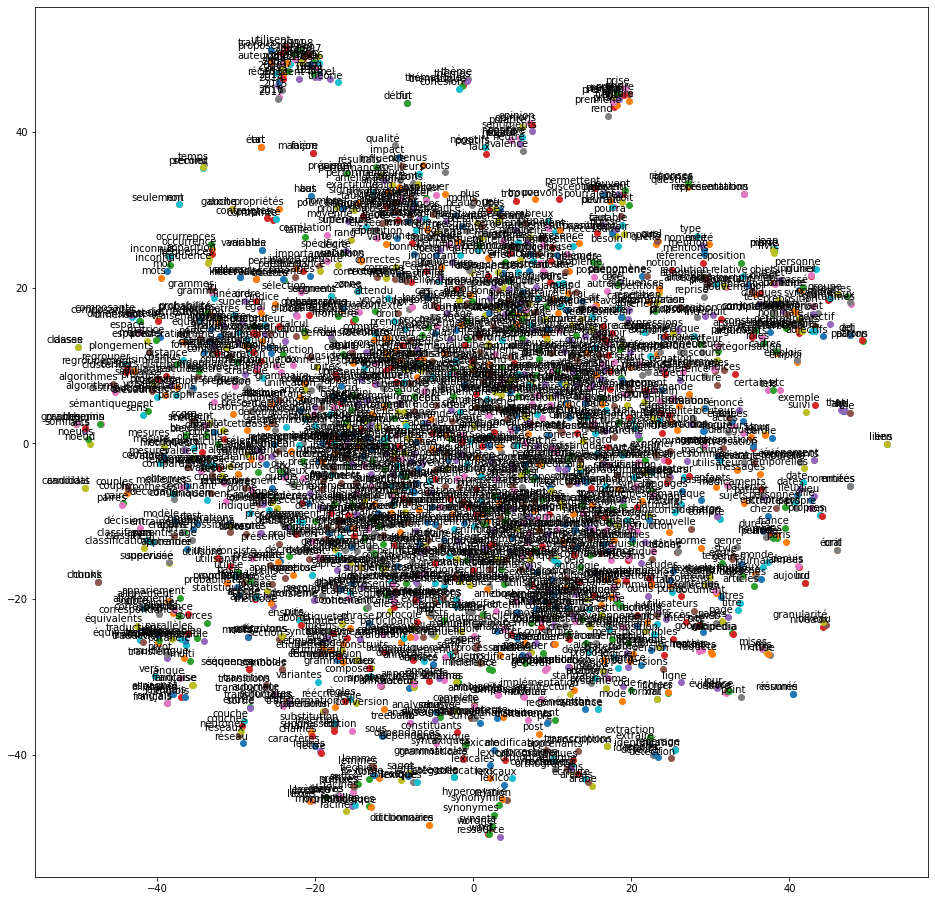

In [ ]:
def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in model.wv.vocab:
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()


tsne_plot(model)

In [ ]:
#TF-IDF

# Nuage de mots avec TF-IDF

Le TF-IDF (term frequency-inverse document frequency) est une méthode de pondération souvent utilisée dans la fouille de textes. Cette mesure statistique permet d'évaluer l'importance d'un terme contenu dans un document, relativement à une collection ou un corpus. 

TF(t) = Nombre d'apparition du terme t dans le document / Nombre total de termes dans le document

IDF(t) = log (nombre total de documents dans le corpus / nombre de documents où le terme t apparaît)

TF-IDF(t)=TF(t)*IDF(t)

Dans notre cas, nous allons utiliser le tf-idf dans le but de voir l'évolution des mots au cours des années. Ceci nous permettra d'avoir une vue sur les techniques/termes utilisés concernant le nlp entre 1997 et 2019.


On commence par mettre la colonne date sous forme d'entier pour sélectionner les articles selon leurs dates.

In [ ]:
corpus_fr['Date']=corpus_fr['Date'].astype('int')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
textcorpus=[x for x in corpus_fr['Article']]

Nous initialisions un Tfidfvectorizer qui nous permettra d'avoir la matrice TFIIDF de notre corpus. On met le max_df à 0.8 ce qui nous permet de ne pas prendre en compte les termes qui appairaissent dans plus de 80% des textes de notre corpus ( trop banal). Idem, on ne prend pas en compte les termes qui apparaissent dans moins de 20% des textes.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer 
vectorizer = TfidfVectorizer(max_df=0.8, min_df=0.2,norm = None) 

X = vectorizer.fit_transform(textcorpus) 
X_vocab = vectorizer.get_feature_names()  #liste des termes retenus dans notre TF-IDF , ainsi chaque texte de notre corpus aura une liste de ces termes avec son tf-idf associé
X_mat = X.todense()  #la matrice tf-idf

Ici, on a 782 mots dans notre Tf-IDf ainsi, pour chaque texte, on aura une liste de taille 782 contenant le tf-idf de chaque termes. On aura donc une matrice de taille (1351,782).

In [ ]:
len(X_vocab)

782

In [ ]:
print(X_mat.shape)

(1351, 782)


On cherche le termes avec le tf-idf le plus grand dans notre matrice et sa position.

In [ ]:
X_mat.max(),X_mat.argmax()

(415.12111082663836, 66717)

On retrouve facilement l'indice en faisant le calcul suivant : 68166/799=85,314

In [ ]:
X_mat[85].max(),X_mat[85].argmax()

(415.12111082663836, 247)

In [ ]:
X_vocab[251]

'déterminer'

Le terme le plus important dans notre matrice est donc dépendance

Maintenant, nous allons voir l'évolution des mots importants contenus dans le corpus selon les années. 
Pour cela, nous allons créer un nuage de mots interactif qui prendra en paramètre la plage de date souhaitée. 
On va utiliser notre matrice TF-IDF sur la plage de date voulu et récupérer les termes les plus importants. 
Ensuite, on va mettre dans une liste les mots retenues dont l'apparition  sera proportionnelle à leurs Tf-IDF.
On utilise enfin wordcloud, qui permettra d'afficher le nuage de mots en fonction de l'apparition des mots dans la liste construite.

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import numpy as np
from math import *
from sklearn.feature_extraction.text import TfidfVectorizer 
import ipywidgets as wp

def TF_IDF_wordcloud(startdate,enddate):

 if(startdate>enddate or enddate<startdate):                 #sélection des textes dans le corpus selon la date choisi
   print("ERREUR : aucune données trouvées pour ces dates!")
 corpus_txt=corpus_fr[(corpus_fr['Date']>=startdate) & (corpus_fr['Date']<=enddate)]
 textcorpus=[x for x in corpus_txt['Article']]

 vectorizer = TfidfVectorizer(max_df=0.8, min_df=0.2,norm = None)  #initialisation du TF-IDF sur les textes correspondants
 X = vectorizer.fit_transform(textcorpus) 
 X_vocab = vectorizer.get_feature_names()
 X_mat = X.todense() 
 #liste_mot=[]
 #for j in X_mat:
   #liste_mot.append(X_vocab[j.argmax()])

 indices=np.argpartition(X_mat.flatten(),-2)[-2:]         #on travaille sur la matrice TF-IDF pour l'ordonner et facilité son utilisation
 X_mat_ord=np.vstack(np.unravel_index(indices,X_mat.shape)).T
 listetedx=[]

 for i in X_mat_ord[-50:]:   #on prend les 35 dernières valeurs de la matrice ordonnée (35 plus grandes valeurs)
  mot=X_vocab[i[1]]                #on récupère le mot dans la liste de vocabulaire X_vocab grâce à son indice
  tf_idf=floor(X_mat[i[0],i[1]]/100)    #on récupère son tf-idf dans la matrice X_mat qu'on divise par 100 pour normaliser
  conca=[mot for j in range(tf_idf)]  #on ajoute le mots autant fois que son tf-idf normalisé est grand (ex: si tf-idf normalisé de 'texte' = 3 ,on l'ajoute 3 fois)
  listetedx+=conca

 data=' '.join(text for text in listetedx)   # on joint tous les mots de la liste
 stopwords = set(nltk.corpus.stopwords.words('french'))   # on initialise le wordcloud et on supprimme stopwords au cas où certains n'auraient pas été supprimmer 
 #stopwords.add('traduction')                           # on peut ajouter des mots à cette liste si certains mots semblent prendre trop de place dans le nuage comme 'traduction '
 #print(stopwords)
 wordcloud = WordCloud(background_color='white',stopwords=stopwords,max_words=45,max_font_size=40, scale=3,random_state=1).generate(str(data))   # on prend 40 mots dans notre nuage
 fig = plt.figure(1, figsize=(20, 20))
 plt.axis('off')
 fig.suptitle("Nuage de mots basé sur TF-IDF sur le corpus TALN entre les années "+str(startdate)+" et "+str(enddate), fontsize=20)
 fig.subplots_adjust(top=2.3)

 plt.imshow(wordcloud)
 plt.show()

x_widget = wp.IntSlider(min=1997, max=2019, step=1,value=2012)
y_widget = wp.IntSlider(min=1997, max=2019, step=1, value=2019)  #on crée les widget pour avoir un nuage interactif à l'aide de ipywidget

def update_x_range(*args):
  x_widget.max = y_widget.value
  y_widget.observe(update_x_range, 'value')

wp.interactive(TF_IDF_wordcloud,startdate=x_widget, enddate=y_widget)

interactive(children=(IntSlider(value=2012, description='startdate', max=2019, min=1997), IntSlider(value=2019…

On obtient un résultat plutôt intéréssant avec notamment l'apparition de mots comme 'grammes','word','réseau' au cours des années qui font sûrement référence à l'apparition des techniques de de wordembedding (word2vec) et du deeplearning. 

#NMF pour topics

Nous allons dans cette section utiliser les TF-IDF et NMF afin de trouver les topics de notre corpus.
Tout d'abord, nous allons créer notre matrice TF-IDF comme nous l'avons fais auparavant.Puis nous allons mettre cette matrice en entrée de notre NMF. NMF (Non-negative matrix factorization) est une technique non supervisée de réduction de dimension et qui permet de trouver les différents sujets d'un corpus. NMF permet de trouver les sujets car il a des propriétés de clustering. En effet, il permet de regrouper les colonnes des données en entrés qui sont ici nos mots et calcule l'appartenance au cluster/sujet.

In [ ]:
textcorpus=[x for x in corpus_fr['Article']]

Ici, on récupères tous les textes

In [ ]:
len(textcorpus)

1351

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
stopwordsfr = set(nltk.corpus.stopwords.words('french'))
vec = TfidfVectorizer(stop_words=stopwordsfr, max_df=0.8, min_df=0.2) #on initialise notre TF-IDF comme pour le nuage
mat_TF_IDF = vec.fit_transform(textcorpus)



In [ ]:
mat_TF_IDF.shape  

(1351, 782)

In [ ]:
X_vocab=vec.get_feature_names()
len(X_vocab)

782

In [ ]:
from sklearn.decomposition import NMF
nmf = NMF(n_components=10, random_state=0) #on initialise notre NMF avec n_components=10 ce qui siginfie que l'on souhaite 10 sujets
nmf.fit(mat_TF_IDF)

NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=10, random_state=0, shuffle=False, solver='cd', tol=0.0001,
    verbose=0)

In [ ]:
len(nmf.components_) 

10

nmf.components_  est une liste de liste des différents sujets trouvés. Par exemple,pour le premier sujet ont aura une liste de coefficient qui correspond aux l'importance des mots dans ce sujet. Voyons un exemple : 

In [ ]:
len(nmf.components_[0])  

782

In [ ]:
 nmf.components_[0].argsort()[-1:-10-1:-1]

array([703, 495, 633, 634, 731, 425, 342,  67,  80, 776])

782  car notre tf-idf possède une liste de mots de 782. Ainsi, pour chaque sujet, nous auront une liste de 782 et ceux avec les plus gros coefficients, sont les mots importants du sujet.

In [ ]:
nmf.components_[0].max(), nmf.components_[0].argmax()

(2.048842788419625, 703)

In [ ]:
X_vocab[nmf.components_[0].argmax()]

'texte'

Ainsi, pour notre premier sujet, le mot le plus important est 'lexique".

Faisons cela sur tout le texte maintenant.

In [ ]:
for i, topic_coeff in enumerate(nmf.components_): #on itère sur notre liste de sujet et de coefficient associés
    print(i, end=' ')
    for j in topic_coeff.argsort()[-1:-10-1:-1]:   #on tri la liste de mots du sujet à l'aide des coeff et on récupère 10 mots les plus importants
        print(X_vocab[j], end=' ')
    print()

0 texte phrase segmentation segments unités méthode indices articles automatique évaluation 
1 sémantique structure énoncé règles système représentation contraintes objets grammaire langage 
2 relation terme sémantique similarité entités sens contexte extraction domaine paires 
3 annotation entités nommées annoté données étiquettes annotés expressions catégories français 
4 document terme similarité recherche web contenu méthodes extraction domaine information 
5 modèle apprentissage mot données performances tâche contexte classification étiquettes test 
6 traduction langue phrase anglais cible français source système paires systèmes 
7 question réponse système phrase utilisateur entités évaluation systèmes module nommées 
8 arbre grammaire phrase structure dépendances syntaxique traits syntaxiques dépendance analyseur 
9 verbe nom lexique mot adjectifs adjectif dictionnaire ressources entrées français 


Ainsi, voici 10 sujets que l'on peut tirer de notre corpus. Les sujets semblent cohérents avec notre corpus qui porte sur le NLP.

Créons maintenant, un NMF interactif où l'on peut choisir son nombre de sujet et son nombre de mots par sujets:

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer 
import ipywidgets as wp
from sklearn.decomposition import NMF

def NMF_interact(nbtopics,nbword_bytopics):
 textcorpus=[x for x in corpus_fr['Article']]
 vectorizer = TfidfVectorizer(max_df=0.8, min_df=0.2,norm = None)  #initialisation du TF-IDF sur les textes correspondants
 X = vectorizer.fit_transform(textcorpus) 
 X_vocab=vec.get_feature_names()
 nmf = NMF(n_components=nbtopics) #on initialise notre NMF avec n_components=10 ce qui siginfie que l'on souhaite 10 sujets
 nmf.fit(X)
 for i, topic_coeff in enumerate(nmf.components_): #on itère sur notre liste de sujet et de coefficient associés
    print(i, end=' ')
    for j in topic_coeff.argsort()[-1:-nbword_bytopics-1:-1]:   #on tri la liste de mots du sujet à l'aide des coeff et on récupère 10 mots les plus importants
        print(X_vocab[j], end=' ')
    print()


#x_widget = wp.IntSlider(min=1997, max=2019, step=1,value=2012)
#y_widget = wp.IntSlider(min=1997, max=2019, step=1, value=2019)  #on crée les widget pour avoir un nuage interactif à l'aide de ipywidget
topic_widget = wp.IntSlider(min=1, max=20, step=1, value=10) 
word_widget = wp.IntSlider(min=1, max=15, step=1, value=5) 
def update_x_range(*args):
  x_widget.max = y_widget.value
  y_widget.observe(update_x_range, 'value')

wp.interactive(NMF_interact,nbtopics=topic_widget,nbword_bytopics=word_widget)

interactive(children=(IntSlider(value=10, description='nbtopics', max=20, min=1), IntSlider(value=5, descripti…

# KNN recherche de textes similaires

Ici, nous allons chercher les textes similaires à l'aide du KNN et du TF-IDF. Le KNN (k-nearest neighbors) est une méthode de classification et qui pemet de  trouver, selon une entrée, les objets qui lui sont similaires. L'algorithme va rechercher les voisins les plus proches dans notre corpus et renvoyer les k premiers résultats. Les entrées qui correspondent à des textes du corpus seront modéliser par leurs vecteurs de la matrice TF-IDF.

Nous commencons par réaliser notre matrice TF-IDF comme précédemment.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
stopwordsfr = set(nltk.corpus.stopwords.words('french'))
vec = TfidfVectorizer(stop_words=stopwordsfr, max_df=0.8, min_df=0.2) #on initialise notre TF-IDF comme pour le nuage
mat_TF_IDF = vec.fit_transform(textcorpus)

Nous allons créer et entrainer notre modèle KNN à partir de la matrice TF-IDF qui est de taille (1351,799). On choisit la metric 'cosine' car elle donne  de bon résultat dans le domaine de la NLP. C'est que l'on va utilisé pour évaluer la distance entre les textes du corpus.

In [ ]:
from sklearn.neighbors import NearestNeighbors
knn = NearestNeighbors(n_neighbors=10, metric='cosine')
knn.fit(mat_TF_IDF)

NearestNeighbors(algorithm='auto', leaf_size=30, metric='cosine',
                 metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                 radius=1.0)

Notre modèle est maintenant entrainé. Essayons maintenant de voir le résultat pour le premier texte de notre corpus.

In [ ]:
knn.kneighbors(mat_TF_IDF[0], return_distance=False)

array([[   0,   66,   22,  649, 1026, 1253,  407,  224,   24, 1287]])

Notre KNN a donc trouvé les 10 textes de notre corpus les plus similaires à notre premier texte.

Voici les titres des textes : 

In [ ]:
test=[0, 66,22,649,1026,1253,407,224,24,1287]
for x in test:
  print(corpus_fr['Titre'][x])

éléments conception système interprétation automatique texte images
représenter temps langue formalisme graphes conceptuels approche basée schèmes sémantico cognitifs
discc outil construction utilisation base connaissances sémantico cognitives verbe
inférences aspecto temporelles analysées logique combinatoire
influence marqueurs multi polaires dépendant domaine fouille opinion niveau texte
analyse inférences fouille opinion chinois
architecture modulaire portable génération langage naturel dialogue homme machine
écrit oral analyses générations
peut couper polysémie verbale
apprentissage déséquilibré détection signaux implication durable conversations parfumerie


# LDA


In [ ]:
pip install pyLDAvis

     |████████████████████████████████| 1.6MB 4.2MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97712 sha256=028921213b7d0ba0f8bd01ca50e63bb978fefe3569afd4fef19976ec5cab0668
  Stored in directory: /root/.cache/pip/wheels/98/71/24/513a99e58bb6b8465bae4d2d5e9dba8f0bef8179e3051ac414
Successfully built pyLDAvis


In [ ]:
import pyLDAvis
import pyLDAvis.sklearn
from sklearn.decomposition import NMF
import numpy as np

In [ ]:
corp = corpus_fr['Article'][0]
corp = [i for i in corp.split()]

from nltk.stem.snowball import FrenchStemmer
stemmer = FrenchStemmer()
l=[]
for i in corp:
  a = stemmer.stem(i)
  l.append(a)

In [ ]:
corp

'modèle grammaire applicative cognitive postule trois niveaux représentations niveau phénotypique observables langues niveau génotypique invariants langagiers enfin niveau cognitif représente sens énoncés puis textes agencements primitives sémantico cognitives comprendre énoncé plus largement texte revient passer niveau phénotypique texte comme concaténation caractères niveau représentations sémantico cognitives compatibles représentations figurales processus compilation généralisée partir principe défini comme processus informatique changements représentations crée représentations intermédiaires différents niveaux 105 élaborée architecture informatique interprétation sémantique textes représentations iconiques fig module extrait texte part relations prédicatives atemporelles autre part valeurs aspecto temporelles interprétées comme opérateurs appliquant dernières texte entrée fois lemmatisé découpé propositions grammaticales font objet analyse catégorielle1 bis afin obtenir formes nor

In [ ]:
#on réutilise ici le corpus d'article nettoyé
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

corp = 

# on recupere les features tf-idf pour le corpus de texte
ptvf = TfidfVectorizer(use_idf=True, min_df=0.05, max_df=0.95, ngram_range=(1,1), sublinear_tf=True)
ptvf_features = ptvf.fit_transform(corpus_fr['Article'])

# dimensions du set de features
print(ptvf_features.shape)

(1351, 3078)


In [ ]:
def get_topics_terms_weights(weights, feature_names):
    feature_names = np.array(feature_names)
    sorted_indices = np.array([list(row[::-1]) 
                           for row 
                           in np.argsort(np.abs(weights))])
    sorted_weights = np.array([list(wt[index]) 
                               for wt, index 
                               in zip(weights,sorted_indices)])
    sorted_terms = np.array([list(feature_names[row]) 
                             for row 
                             in sorted_indices])
    
    topics = [np.vstack((terms.T, term_weights.T)).T 
              for terms, term_weights 
              in zip(sorted_terms, sorted_weights)]     
    
    return topics     

def print_topics_udf(topics, total_topics=1,
                     weight_threshold=0.0001,
                     display_weights=False,
                     num_terms=None):
    
    for index in range(total_topics):
        topic = topics[index]
        topic = [(term, float(wt))
                 for term, wt in topic]
        topic = [(word, round(wt,2)) 
                 for word, wt in topic 
                 if abs(wt) >= weight_threshold]
                     
        if display_weights:
            print('Topic #'+str(index+1)+' with weights')
            print(topic[:num_terms]) if num_terms else topic
        else:
            print('Topic #'+str(index+1)+' without weights')
            tw = [term for term, wt in topic]
            print(tw[:num_terms]) if num_terms else tw
        print()    

In [ ]:
pyLDAvis.enable_notebook()
total_topics = 10

# construction du model de topics
nmf = NMF(n_components=total_topics, random_state=101, alpha=0.1, l1_ratio=0.2)
nmf.fit(ptvf_features)

# extraction des features et des poids
corp_names = ptvf.get_feature_names()
corp_weights = nmf.components_

# extraction et affichage des topics et de leur contenu
topics = get_topics_terms_weights(corp_weights, corp_names)
print_topics_udf(topics=topics,
                 total_topics=total_topics,
                 num_terms=15,
                 display_weights=True)



Topic #1 with weights
[('discours', 0.18), ('objet', 0.17), ('donc', 0.16), ('fait', 0.15), ('peut', 0.15), ('relation', 0.15), ('éléments', 0.15), ('cas', 0.15), ('ici', 0.14), ('point', 0.14), ('expression', 0.13), ('tout', 0.13), ('exemple', 0.13), ('bien', 0.13), ('question', 0.13)]

Topic #2 with weights
[('grammaire', 0.36), ('arbre', 0.35), ('arbres', 0.33), ('grammaires', 0.32), ('noeud', 0.3), ('noeuds', 0.29), ('structures', 0.26), ('formalisme', 0.24), ('tag', 0.23), ('structure', 0.21), ('dérivation', 0.2), ('représentation', 0.19), ('syntaxique', 0.19), ('élémentaires', 0.18), ('traits', 0.18)]

Topic #3 with weights
[('mots', 0.22), ('modèle', 0.22), ('score', 0.21), ('modèles', 0.21), ('probabilité', 0.21), ('apprentissage', 0.2), ('algorithme', 0.2), ('performances', 0.2), ('taille', 0.19), ('résultats', 0.19), ('méthode', 0.18), ('vecteur', 0.18), ('nombre', 0.18), ('méthodes', 0.18), ('paramètres', 0.18)]

Topic #4 with weights
[('formes', 0.25), ('lexique', 0.23), ('

In [ ]:
#affichage graphique 
pyLDAvis.sklearn.prepare(nmf, ptvf_features, ptvf, R=15)

/usr/local/lib/python3.6/dist-packages/pyLDAvis/_prepare.py:223: RuntimeWarning: divide by zero encountered in log
  kernel = (topic_given_term * np.log((topic_given_term.T / topic_proportion).T))
/usr/local/lib/python3.6/dist-packages/pyLDAvis/_prepare.py:240: RuntimeWarning: divide by zero encountered in log
  log_lift = np.log(topic_term_dists / term_proportion)
/usr/local/lib/python3.6/dist-packages/pyLDAvis/_prepare.py:241: RuntimeWarning: divide by zero encountered in log
  log_ttd = np.log(topic_term_dists)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.051845  0.052247       1        1  17.206816
0     -0.067790  0.090158       2        1  17.162402
3      0.000263  0.043255       3        1  11.397729
1     -0.108862  0.171040       4        1   9.855882
8      0.080137  0.072548       5        1   9.468317
9     -0.060110 -0.094674       6        1   8.987000
4      0.130189 -0.122409       7        1   8.408462
6      0.007910 -0.142122       8        1   6.381386
7      0.181311  0.031589       9        1   5.685986
5     -0.214893 -0.101632      10        1   5.446020, topic_info=               Term       Freq      Total Category  logprob  loglift
784        dialogue  28.000000  28.000000  Default  15.0000  15.0000
2805     traduction  36.000000  36.000000  Default  14.0000  14.0000
2806    traductions  25.000000  25.000000  Default  13.0000  13.0000
1011        entités  33.000000  33.000000  Default  12.0000  12.0000
1817        nommées  25.000000  25.000000  Default  11.0000  11.0000
...             ...        ...        ...      ...      ...      ...
1619       locuteur   8.005499  12.883767  Topic10  -5.2493   2.4344
513   communication   7.368965  12.575793  Topic10  -5.3322   2.3758
2881    utilisateur  10.605488  28.588854  Topic10  -4.9681   1.9186
1735         module   9.823233  28.377312  Topic10  -5.0447   1.8494
2695        système   9.694641  47.667599  Topic10  -5.0579   1.3176

[309 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
6         2  0.727397       1983
34        1  0.158401       2012
34        5  0.105601       2012
34        6  0.052800       2012
34        7  0.633604       2012
...     ...       ...        ...
3049      7  0.090316      étude
3049      8  0.045158      étude
3049      9  0.090316      étude
3076      2  0.431014  événement
3076      8  0.603420  événement

[1042 rows x 3 columns], R=15, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 1, 4, 2, 9, 10, 5, 7, 8, 6])

In [ ]:
from nltk.stem.snowball import FrenchStemmer
stemmer = FrenchStemmer()

art = corpus_fr['Article']
corp = []
for i in art:
  temp = [stemmer.stem(j) for j in i.split()]
  temp = ' '.join(temp)
  corp.append(temp)

print(len(corp))
corp[0]

NameError: ignored

In [ ]:
art = corpus_fr['Article']

corp = [i for i in corp.split()]

from nltk.stem.snowball import FrenchStemmer
stemmer = FrenchStemmer()
l=[]
for i in corp:
  a = stemmer.stem(i)
  l.append(a)

